# Rain Prediction in Sydeny AUS


I built a classifier to predict whether or not it will rain tomorrow in Sydney Australia by training a binary classification model. I have used the Rain in Australia dataset downloaded from the Kaggle website for this project.

# 1.Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

(145460, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.drop_duplicates(inplace=True)
data.shape

(145460, 23)

In [6]:
sdn = data[data.Location == 'Sydney']
sdn.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [7]:
sdn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3344 non-null   object 
 1   Location       3344 non-null   object 
 2   MinTemp        3340 non-null   float64
 3   MaxTemp        3342 non-null   float64
 4   Rainfall       3337 non-null   float64
 5   Evaporation    3293 non-null   float64
 6   Sunshine       3328 non-null   float64
 7   WindGustDir    2306 non-null   object 
 8   WindGustSpeed  2306 non-null   float64
 9   WindDir9am     3288 non-null   object 
 10  WindDir3pm     3311 non-null   object 
 11  WindSpeed9am   3318 non-null   float64
 12  WindSpeed3pm   3319 non-null   float64
 13  Humidity9am    3329 non-null   float64
 14  Humidity3pm    3331 non-null   float64
 15  Pressure9am    3323 non-null   float64
 16  Pressure3pm    3325 non-null   float64
 17  Cloud9am       2776 non-null   float64
 18  Clo

In [8]:
sdn.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
dtype: int64

#### I want to simplify the data more, so I will calculate average value of any XXX9am and XXX3pm

#### for romoving we will fill Nan with most common value of yhe column

In [9]:
sdn['WindSpeed9am'].fillna(value=sdn['WindSpeed9am'].mode()[0],inplace=True )


c:\program files\python38\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [10]:
sdn['WindSpeed3pm'].fillna(value=sdn['WindSpeed3pm'].mode()[0],inplace=True )
sdn['WindDir9am'].fillna(value=sdn['WindDir9am'].mode()[0],inplace=True )
sdn['WindDir3pm'].fillna(value=sdn['WindDir3pm'].mode()[0],inplace=True )
sdn['Humidity9am'].fillna(value=sdn['Humidity9am'].mode()[0],inplace=True )
sdn['Humidity3pm'].fillna(value=sdn['Humidity3pm'].mode()[0],inplace=True )
sdn['Pressure9am'].fillna(value=sdn['Pressure9am'].mode()[0],inplace=True )
sdn['Pressure3pm'].fillna(value=sdn['Pressure3pm'].mode()[0],inplace=True )
sdn['Cloud9am'].fillna(value=sdn['Cloud9am'].mode()[0],inplace=True )
sdn['Cloud3pm'].fillna(value=sdn['Cloud3pm'].mode()[0],inplace=True )
sdn['Temp9am'].fillna(value=sdn['Temp9am'].mode()[0],inplace=True )
sdn['Temp3pm'].fillna(value=sdn['Temp3pm'].mode()[0],inplace=True )



In [11]:
sdn.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           7
RainTomorrow        7
dtype: int64

In [15]:
sdn = sdn.drop(['WindSpeed'], axis=1)

KeyError: "['WindSpeed'] not found in axis"

In [16]:
sdn['WindSpeed'] = (sdn['WindSpeed9am'] + sdn['WindSpeed3pm'])/2

In [17]:
sdn['Humidity'] = (sdn['Humidity9am'] + sdn['Humidity3pm'])/2
sdn['Pressure'] = (sdn['Pressure9am'] + sdn['Pressure3pm'])/2
sdn['Cloud'] = (sdn['Cloud9am'] + sdn['Cloud3pm'])/2
sdn['Temp'] = (sdn['Temp9am'] + sdn['Temp3pm'])/2

KeyError: 'Humidity9am'

In [18]:
sdn = sdn.drop(['Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Cloud3pm', 'Cloud9am', 'Temp3pm', 'Temp9am'], axis=1)

KeyError: "['Humidity9am' 'Humidity3pm' 'Pressure3pm' 'Pressure9am' 'Cloud3pm'\n 'Cloud9am' 'Temp3pm' 'Temp9am'] not found in axis"

In [19]:
sdn.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,RainToday,RainTomorrow,Humidity,Pressure,Cloud,Temp,WindSpeed
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,Yes,Yes,88.0,1017.50,8.0,20.80,18.5
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,Yes,Yes,78.0,1017.15,7.0,23.60,11.0
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,Yes,Yes,87.0,1016.15,7.5,23.25,9.5
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,Yes,Yes,86.5,1013.00,8.0,21.15,21.0
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,Yes,Yes,81.0,1006.55,8.0,24.00,8.5


In [20]:
sdn = sdn.drop(['WindSpeed9am', 'WindSpeed3pm'], axis=1)

#### We have temp average so we can romove Min\maxTemp columns

In [21]:
sdn = sdn.drop(['MinTemp', 'MaxTemp'], axis=1)

We will remove also all wind dir and speed from the data also

In [22]:
sdn = sdn.drop(['WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm'], axis=1)

In [23]:
sdn.head()

,Date,Location,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Humidity,Pressure,Cloud,Temp,WindSpeed
30176,2008-02-01,Sydney,15.6,6.2,0.0,Yes,Yes,88.0,1017.50,8.0,20.80,18.5
30177,2008-02-02,Sydney,6.0,3.4,2.7,Yes,Yes,78.0,1017.15,7.0,23.60,11.0
30178,2008-02-03,Sydney,6.6,2.4,0.1,Yes,Yes,87.0,1016.15,7.5,23.25,9.5
30179,2008-02-04,Sydney,18.8,2.2,0.0,Yes,Yes,86.5,1013.00,8.0,21.15,21.0
30180,2008-02-05,Sydney,77.4,NaN,0.0,Yes,Yes,81.0,1006.55,8.0,24.00,8.5


In [24]:
sdn.sort_values(by=['Date'])
sdn = sdn.drop(['Location'], axis=1)

In [25]:
sdn['RainToday'].fillna(value=sdn['RainToday'].mode()[0],inplace=True )
sdn['RainTomorrow'].fillna(value=sdn['RainTomorrow'].mode()[0],inplace=True )

In [26]:
sdn.isnull().sum()

Date             0
Rainfall         7
Evaporation     51
Sunshine        16
RainToday        0
RainTomorrow     0
Humidity         0
Pressure         0
Cloud            0
Temp             0
WindSpeed        0
dtype: int64

In [27]:
sdn['Date'] = pd.to_datetime(sdn['Date'])
sdn['Year'] = sdn['Date'].dt.year
sdn['Month'] = sdn['Date'].dt.month
sdn['Day'] = sdn['Date'].dt.day

sdn = sdn.drop(columns='Date')

In [28]:
sdn.isnull().sum()

Rainfall         7
Evaporation     51
Sunshine        16
RainToday        0
RainTomorrow     0
Humidity         0
Pressure         0
Cloud            0
Temp             0
WindSpeed        0
Year             0
Month            0
Day              0
dtype: int64

In [29]:
sdn.head()

,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,Humidity,Pressure,Cloud,Temp,WindSpeed,Year,Month,Day
30176,15.6,6.2,0.0,Yes,Yes,88.0,1017.50,8.0,20.80,18.5,2008,2,1
30177,6.0,3.4,2.7,Yes,Yes,78.0,1017.15,7.0,23.60,11.0,2008,2,2
30178,6.6,2.4,0.1,Yes,Yes,87.0,1016.15,7.5,23.25,9.5,2008,2,3
30179,18.8,2.2,0.0,Yes,Yes,86.5,1013.00,8.0,21.15,21.0,2008,2,4
30180,77.4,NaN,0.0,Yes,Yes,81.0,1006.55,8.0,24.00,8.5,2008,2,5


In [30]:
sdn['Evaporation'].fillna(value=sdn['Evaporation'].mode()[0],inplace=True )
sdn['Rainfall'].fillna(value=sdn['Rainfall'].mode()[0],inplace=True )
sdn['Sunshine'].fillna(value=sdn['Sunshine'].mode()[0],inplace=True )

In [31]:
sdn.isnull().sum()

Rainfall        0
Evaporation     0
Sunshine        0
RainToday       0
RainTomorrow    0
Humidity        0
Pressure        0
Cloud           0
Temp            0
WindSpeed       0
Year            0
Month           0
Day             0
dtype: int64

In [32]:
sdn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rainfall      3344 non-null   float64
 1   Evaporation   3344 non-null   float64
 2   Sunshine      3344 non-null   float64
 3   RainToday     3344 non-null   object 
 4   RainTomorrow  3344 non-null   object 
 5   Humidity      3344 non-null   float64
 6   Pressure      3344 non-null   float64
 7   Cloud         3344 non-null   float64
 8   Temp          3344 non-null   float64
 9   WindSpeed     3344 non-null   float64
 10  Year          3344 non-null   int64  
 11  Month         3344 non-null   int64  
 12  Day           3344 non-null   int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 365.8+ KB


In [33]:
sdn = pd.get_dummies(sdn,columns=['RainToday'], drop_first=True)

In [34]:
sdn = pd.get_dummies(sdn,columns=['RainTomorrow'], drop_first=True)

In [35]:
sdn.head()

,Rainfall,Evaporation,Sunshine,Humidity,Pressure,Cloud,Temp,WindSpeed,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
30176,15.6,6.2,0.0,88.0,1017.50,8.0,20.80,18.5,2008,2,1,1,1
30177,6.0,3.4,2.7,78.0,1017.15,7.0,23.60,11.0,2008,2,2,1,1
30178,6.6,2.4,0.1,87.0,1016.15,7.5,23.25,9.5,2008,2,3,1,1
30179,18.8,2.2,0.0,86.5,1013.00,8.0,21.15,21.0,2008,2,4,1,1
30180,77.4,4.0,0.0,81.0,1006.55,8.0,24.00,8.5,2008,2,5,1,1


In [36]:
sdn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344 entries, 30176 to 33519
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rainfall          3344 non-null   float64
 1   Evaporation       3344 non-null   float64
 2   Sunshine          3344 non-null   float64
 3   Humidity          3344 non-null   float64
 4   Pressure          3344 non-null   float64
 5   Cloud             3344 non-null   float64
 6   Temp              3344 non-null   float64
 7   WindSpeed         3344 non-null   float64
 8   Year              3344 non-null   int64  
 9   Month             3344 non-null   int64  
 10  Day               3344 non-null   int64  
 11  RainToday_Yes     3344 non-null   uint8  
 12  RainTomorrow_Yes  3344 non-null   uint8  
dtypes: float64(8), int64(3), uint8(2)
memory usage: 320.0 KB


# 2. Data analytics

after filtering the data, I want to see the connections between the features to the prediction

Text(0, 0.5, 'Rain Tomorrow')

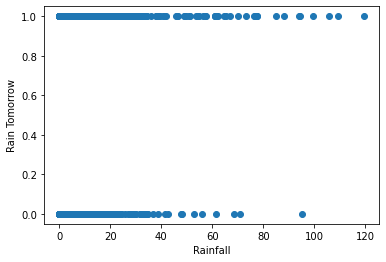

In [37]:
plt.scatter(x = sdn['Rainfall'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Rainfall")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

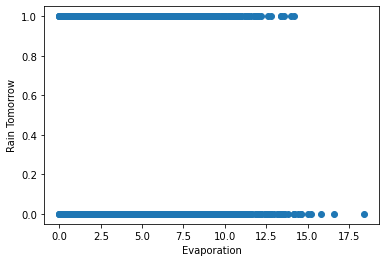

In [38]:
plt.scatter(x = sdn['Evaporation'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Evaporation")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

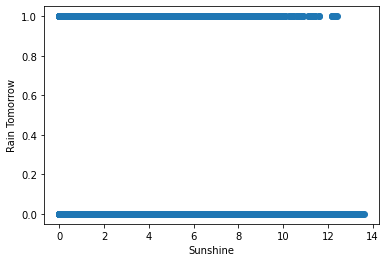

In [39]:
plt.scatter(x = sdn['Sunshine'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Sunshine")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

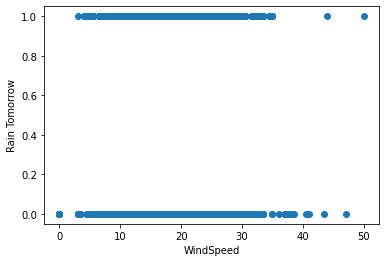

In [40]:
plt.scatter(x = sdn['WindSpeed'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("WindSpeed")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

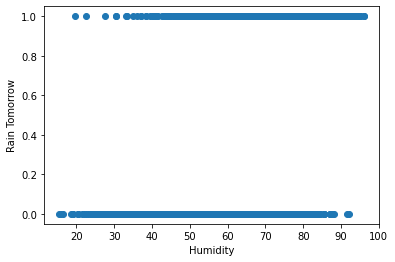

In [41]:
plt.scatter(x = sdn['Humidity'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Humidity")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

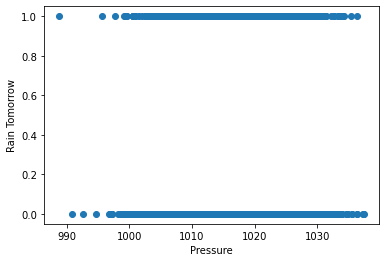

In [42]:
plt.scatter(x = sdn['Pressure'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Pressure")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

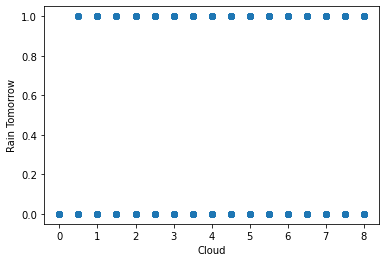

In [43]:
plt.scatter(x = sdn['Cloud'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Cloud")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

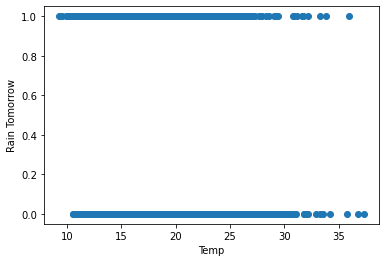

In [44]:
plt.scatter(x = sdn['Temp'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("Temp")
plt.ylabel("Rain Tomorrow")

Text(0, 0.5, 'Rain Tomorrow')

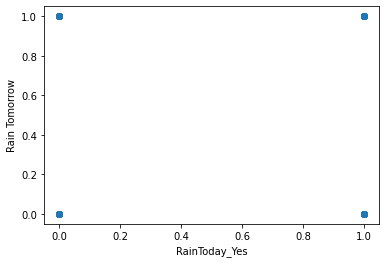

In [45]:
plt.scatter(x = sdn['RainToday_Yes'], y = sdn['RainTomorrow_Yes'])
plt.xlabel("RainToday_Yes")
plt.ylabel("Rain Tomorrow")

In [46]:
sdn.RainToday_Yes.value_counts()

0    2478
1     866
Name: RainToday_Yes, dtype: int64

In [47]:
sdn[sdn.RainToday_Yes == 0].RainTomorrow_Yes.value_counts()

0    2056
1     422
Name: RainTomorrow_Yes, dtype: int64

In [48]:
sdn[sdn.RainToday_Yes == 1].RainTomorrow_Yes.value_counts()

1    443
0    423
Name: RainTomorrow_Yes, dtype: int64

In [49]:
corr_matrix = sdn.corr()
corr_matrix.RainTomorrow_Yes

Rainfall            0.293934
Evaporation        -0.069448
Sunshine           -0.517219
Humidity            0.442175
Pressure           -0.010377
Cloud               0.411039
Temp               -0.092685
WindSpeed           0.034688
Year                0.001924
Month              -0.049176
Day                -0.021059
RainToday_Yes       0.341377
RainTomorrow_Yes    1.000000
Name: RainTomorrow_Yes, dtype: float64

In [50]:
sdn.Sunshine.value_counts()

0.0     199
9.8      72
10.2     65
9.7      63
10.1     62
       ... 
13.2      6
13.4      4
13.3      4
13.5      2
13.6      1
Name: Sunshine, Length: 137, dtype: int64

In [51]:
sdn[sdn.Sunshine == 0].RainTomorrow_Yes.value_counts()

1    149
0     50
Name: RainTomorrow_Yes, dtype: int64

In [52]:
sdn[sdn.Sunshine == 10].RainTomorrow_Yes.value_counts()

0    52
1     3
Name: RainTomorrow_Yes, dtype: int64

# 3. Model training

## 3.1 KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [54]:
X = sdn.drop(['RainTomorrow_Yes'], axis=1)
y = sdn['RainTomorrow_Yes']

In [55]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [56]:
cols = sdn.columns
X = pd.DataFrame(X, columns=[cols[:-1]])
X

,Rainfall,Evaporation,Sunshine,Humidity,Pressure,Cloud,Temp,WindSpeed,Year,Month,Day,RainToday_Yes
0,0.130653,0.336957,0.000000,0.900621,0.590113,1.0000,0.410714,0.37,0.0,0.090909,0.000000,1.0
1,0.050251,0.184783,0.198529,0.776398,0.582904,0.8750,0.510714,0.22,0.0,0.090909,0.033333,1.0
2,0.055276,0.130435,0.007353,0.888199,0.562307,0.9375,0.498214,0.19,0.0,0.090909,0.066667,1.0
3,0.157454,0.119565,0.000000,0.881988,0.497425,1.0000,0.423214,0.42,0.0,0.090909,0.100000,1.0
4,0.648241,0.217391,0.000000,0.813665,0.364573,1.0000,0.525000,0.17,0.0,0.090909,0.133333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3339,0.000000,0.108696,0.573529,0.583851,0.756952,0.2500,0.175000,0.42,1.0,0.454545,0.666667,0.0
3340,0.000000,0.108696,0.676471,0.621118,0.776519,0.2500,0.198214,0.27,1.0,0.454545,0.700000,0.0
3341,0.000000,0.130435,0.198529,0.683230,0.598352,0.7500,0.158929,0.28,1.0,0.454545,0.733333,0.0
3342,0.000000,0.076087,0.683824,0.372671,0.563337,0.4375,0.228571,0.36,1.0,0.454545,0.766667,0.0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

best K results was with k=28 and the accuracy was 0.8251121076233184


Text(0, 0.5, 'Accuracy score')

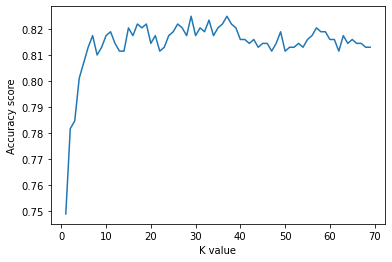

In [58]:
from sklearn.metrics import accuracy_score

k_range = range(1,70)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
#     print('{0:0.4f}'.format(accuracy_score(y_test, y_pred)))
    scores.append(accuracy_score(y_test, y_pred))

print("best K results was with k={} and the accuracy was {}".format(scores.index(max(scores)), max(scores)))
plt.plot(k_range,scores)
plt.xlabel("K value")
plt.ylabel("Accuracy score")

#### With K = 28 we received the best accuracy of 0.82511

## 3.2 Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8296


### We can see that the accuracy of logistic regression is 0.8281 when the best accuracy with KNN we get is 0.8251 

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[454,  22],
       [ 92, 101]], dtype=int64)

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr ,trh =roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
logreg.predict_proba(X_test)

array([[0.59085699, 0.40914301],
       [0.16889432, 0.83110568],
       [0.85572113, 0.14427887],
       ...,
       [0.9564092 , 0.0435908 ],
       [0.41226695, 0.58773305],
       [0.2974123 , 0.7025877 ]])

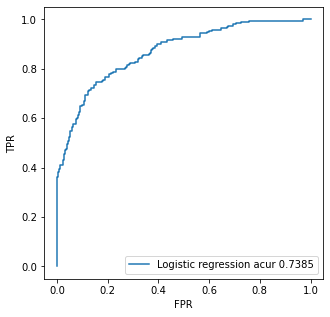

In [63]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr, label="Logistic regression acur {0:0.4f}".format(roc_auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [64]:
X_train.columns

MultiIndex([(     'Rainfall',),
            (  'Evaporation',),
            (     'Sunshine',),
            (     'Humidity',),
            (     'Pressure',),
            (        'Cloud',),
            (         'Temp',),
            (    'WindSpeed',),
            (         'Year',),
            (        'Month',),
            (          'Day',),
            ('RainToday_Yes',)],
           )

# Summary: 

* With KNN : 0.8251 
* With Logistic Reg: 0.8281
* There have been manipulations on the data - some features was removed manually. 
* The prediction was only on one city - Sydney.


# Semester B imporvments

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df = df.drop_duplicates()
df = df.dropna()

In [4]:
data= df.drop(['RainTomorrow'],axis = 1)
data.shape

(56420, 22)

In [8]:
label = df['RainTomorrow']
label

6049      No
6050      No
6052      No
6053      No
6054      No
          ..
142298    No
142299    No
142300    No
142301    No
142302    No
Name: RainTomorrow, Length: 56420, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data = pd.get_dummies(data, columns=['WindGustDir'])

In [13]:
data = pd.get_dummies(data, columns=['WindDir9am'])
data = pd.get_dummies(data, columns=['WindDir3pm'])
data = pd.get_dummies(data, columns=['RainToday'], drop_first=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             56420 non-null  datetime64[ns]
 1   Location         56420 non-null  object        
 2   MinTemp          56420 non-null  float64       
 3   MaxTemp          56420 non-null  float64       
 4   Rainfall         56420 non-null  float64       
 5   Evaporation      56420 non-null  float64       
 6   Sunshine         56420 non-null  float64       
 7   WindGustSpeed    56420 non-null  float64       
 8   WindSpeed9am     56420 non-null  float64       
 9   WindSpeed3pm     56420 non-null  float64       
 10  Humidity9am      56420 non-null  float64       
 11  Humidity3pm      56420 non-null  float64       
 12  Pressure9am      56420 non-null  float64       
 13  Pressure3pm      56420 non-null  float64       
 14  Cloud9am         56420 non-null  f

In [15]:
data = pd.get_dummies(data, columns=['Location'])

In [16]:
import datetime
data['Date']=data['Date'].map(datetime.datetime.toordinal)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 92 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       56420 non-null  int64  
 1   MinTemp                    56420 non-null  float64
 2   MaxTemp                    56420 non-null  float64
 3   Rainfall                   56420 non-null  float64
 4   Evaporation                56420 non-null  float64
 5   Sunshine                   56420 non-null  float64
 6   WindGustSpeed              56420 non-null  float64
 7   WindSpeed9am               56420 non-null  float64
 8   WindSpeed3pm               56420 non-null  float64
 9   Humidity9am                56420 non-null  float64
 10  Humidity3pm                56420 non-null  float64
 11  Pressure9am                56420 non-null  float64
 12  Pressure3pm                56420 non-null  float64
 13  Cloud9am                   56420 non-null 

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=0)

1


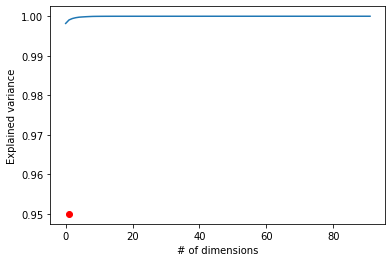

In [18]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
plt.xlabel('# of dimensions')
plt.ylabel('Explained variance')
plt.plot(cumsum);
plt.plot(d, 0.95, color='red', marker='o');

we can see that we can use a 1 demention data

In [19]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import scikitplot.metrics as skplt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def KNN(X_train,y_train,X_test,y_test, algo, n,w):
    clf = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm= algo, n_jobs=-1)
    clf.fit(X_train,y_train)
    probs= clf.predict_proba(X_test)
    #print("AUC score on test data", roc_auc_score(y_test,probs,multi_class='ovr'))
    prediction = clf.predict(X_test)
    skplt.plot_confusion_matrix(y_test,prediction)
    print('accuracy score :',accuracy_score(y_test, prediction))
    print("macro f1 score for data :",metrics.f1_score(y_test, prediction, average = 'macro'))
    print("micro f1 scoore for data:",metrics.f1_score(y_test, prediction, average = 'micro'))
    print("hamming loss for data:",metrics.hamming_loss(y_test,prediction))
    print("Precision recall report for data:\n",metrics.classification_report(y_test, prediction))

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_neighbors': [10, 30, 90], 'weights': ['distance', 'uniform'], 'algorithm': ['ball_tree','kd_tree','brute']},
 ]
clf = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(clf, param_grid, cv=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}

In [22]:
y_train.shape

(42315,)

accuracy score : 0.8482098546614676
macro f1 score for data : 0.7421570131427173
micro f1 scoore for data: 0.8482098546614676
hamming loss for data: 0.15179014533853244
Precision recall report for data:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91     11019
         Yes       0.74      0.47      0.58      3086

    accuracy                           0.85     14105
   macro avg       0.80      0.71      0.74     14105
weighted avg       0.84      0.85      0.84     14105



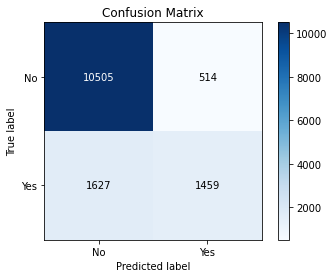

In [31]:
KNN(x_train,y_train,x_test,y_test, 'ball_tree', 10, 'distance')

# Summary:

We manage to create a better classifaier! 
* this classifier used all data without removing the features manually.
* we reduce the features to 1 dimention (instead of 92 with dummy). less features are better for classification.
* the classifier predict not only for Sydney but for all AUS.
* previus prediction accuracy was 0.82 now its 0.85
